# Practice Problems 4

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
from mpl_toolkits.mplot3d import Axes3D
from ipywidgets import interact, FloatSlider, Dropdown
import ipywidgets as widgets
import pandas as pd
from sklearn.linear_model import Ridge, LinearRegression
import warnings

# Suppress warnings
warnings.filterwarnings("ignore")

# Set random seed for reproducibility -- Uncomment for reproducibility
# np.random.seed(42)

## Exercise 1

Let us say, given the samples $X_i = \{ x_i ^t , r_i^t\}$, we define $g_i(x) = r_i^1$, namely, our estimate for any $x$ is the $r$ value of the first instance in the (unordered) dataset $X_i$. What can you say about its bias and variance, as compared with $g_i(x) = 2$ and $g_i(x) = \sum_t r_i^t / N$? What if the sample is ordered, so that $g_i(x) = \min_t r_i^t$?

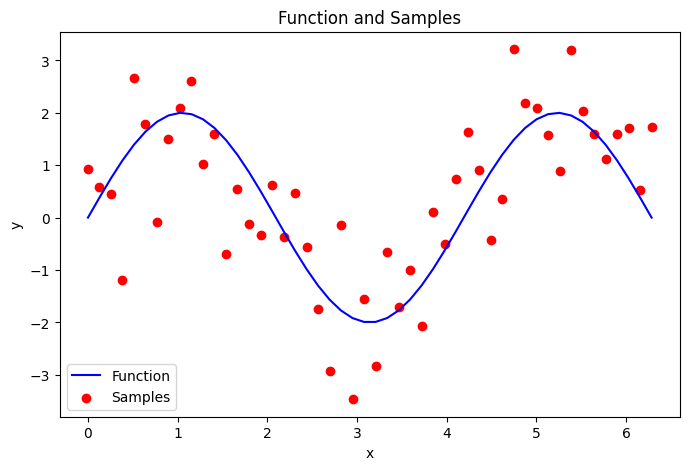

In [2]:
def f(size, minx = 0, maxx=5, fun = lambda x: 2 * np.sin(1.5 * x)):
    """
    Generate a function and its values.
    """
    x = np.linspace(minx, maxx, size)
    y = fun(x)
    return x, y

def samples(size, minx = 0, maxx=5, fun = lambda x: 2 * np.sin(1.5 * x), shuffle=True):
    """
    Generate samples from a function with noise.
    """
    x = np.linspace(minx, maxx, size)
    if shuffle: np.random.shuffle(x)
    y = fun(x) + np.random.randn(size)
    return x, y

plt.figure(figsize=(8, 5))
f_x, f_y = f(50, maxx = 2*np.pi)
plt.plot(f_x, f_y, label='Function', color='blue')
x, y = samples(50, maxx = 2*np.pi)
plt.scatter(x, y, label='Samples', color='red')
plt.title('Function and Samples')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

Now we will define a model strategy in order to simulate each of three scenarios described in the problem

In [3]:
def g1(x,r):
    '''
    Given a set of samples (x,r), the function returns a model that estimates
    for any x the value of r of the first instance of the dataset.
    '''
    return lambda x: np.full_like(x, r[0])

def g2(x,r):
    '''
    Given a set of samples (x,r), the function returns a model that estimates
    for any x the value of r = 2.
    '''
    return lambda x:  np.full_like(x, 2)

def g3(x,r):
    '''
    Given a set of samples (x,r), the function returns a model that estimates
    for any x the mean value of the r values.
    '''
    v = np.mean(r)
    return lambda x: np.full_like(x, v)

def g4(x,r):
    '''
    Given a set of samples (x,r), the function returns a model that estimates
    for any x the mean value of the r values.
    '''
    v = min(r)
    return lambda x: np.full_like(x, v)

Also, we make routines to get the model bias, variance and mean-squared error for further plotting and analysis 

In [4]:
def averageModel(models,x):
    """
    Calculate the average of a model.
    """
    return np.mean([model(x) for model in models] , axis=0)

def bias2(models, x, real):
    """
    Calculate the bias of a model.
    """
    return np.linalg.norm(averageModel(models,x) - real)**2 / x.shape[0]

def variance(models, x):
    """
    Calculate the variance of a model.
    """
    avg_model = averageModel(models,x)
    return np.mean( [np.linalg.norm(avg_model - model(x))**2  for model in models] ) / x.shape[0]


def meanSquareError(model, x, real):
    """
    Calculate the mean square error of a model.
    """
    return bias2(model, x, real) + variance(model, x)

### Case 1. $g_i(x) = r_i^{1}$

In this scenario, the value of the first sample of each dataset is chosen as the estimator of our function (In other words, the estimator will be a constant function related to a single point of the dataset). This leads to some issues in the model performance; as for every dataset as wee choose only a single value, this model will not capture the complete behaviour of the data. Traduced into the bias and variance schema, this model will lead to a large bias and large variance as it does not really take into account all the data for the model

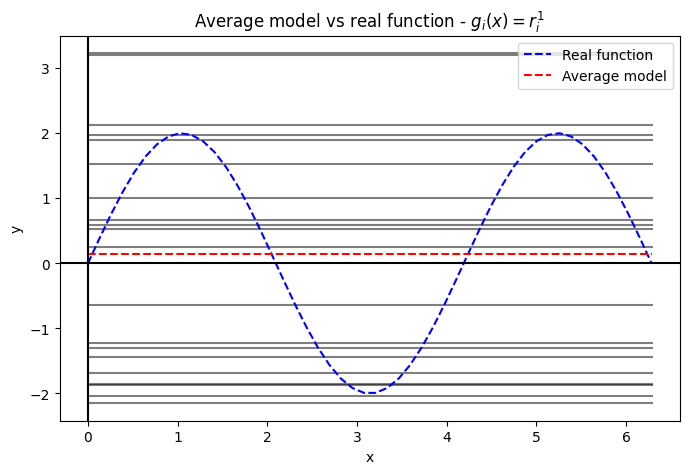

In [5]:
n_samples = 50
n_models = 20

f_x, f_y = f(n_samples, maxx = 2*np.pi)
modelsg1 = []
plt.figure(figsize=(8, 5))
for i in range(n_models):
    x, y = samples(n_samples, maxx = 2*np.pi)
    model = g1(x,y)
    modelsg1.append(model)
    plt.plot(f_x, model(f_x), color='black', alpha=0.5)
    plt.title('Average model vs real function - $g_i(x) = r_i^1$') 
    plt.xlabel('x')
    plt.ylabel('y')

plt.plot(f_x, f_y, label='Real function', color='blue', linestyle='--')
plt.plot(f_x, averageModel(modelsg1,x), label='Average model', color='red', linestyle='--')
plt.axvline(0, color='black', linestyle='-')
plt.axhline(0, color='black', linestyle='-')
plt.legend()
plt.show()

In [6]:
varg1 = variance(modelsg1, f_x)
biasg1 = bias2(modelsg1, f_x, f_y)
mseg1 = meanSquareError(modelsg1, f_x, f_y)

print(f"Variance: {varg1:.4f}")
print(f"Bias: {biasg1:.4f}")
print(f"Mean Square Error: {mseg1:.4f}")

Variance: 3.0531
Bias: 1.8632
Mean Square Error: 4.9163


### Case 2. $g_i(x) = 2$

In this scenario, an arbitrary constant is chosen as the estimator of our function (In other words, the estimator will be a constant function related to a value independent of the data). This leads to several issues in the model performance; as we are not actually using the data, this model will not capture any behaviour of the data. Traduced into the bias and variance schema, this model will lead to a extremely large bias and an zero variance as it does not use the data and has always the same model output

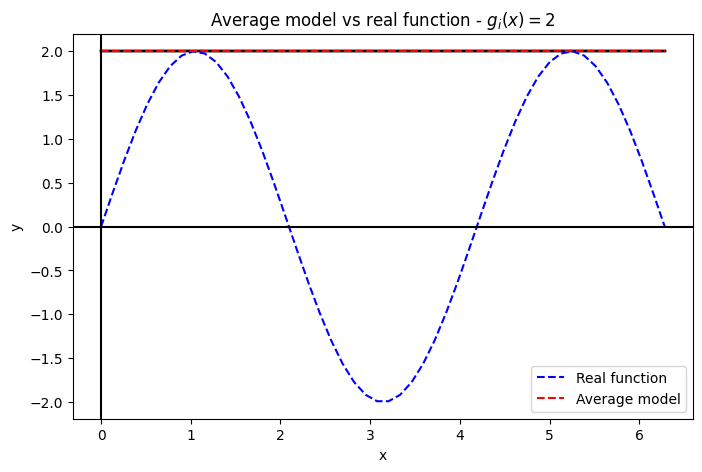

In [7]:
n_samples = 50
n_models = 20

f_x, f_y = f(n_samples, maxx = 2*np.pi)
modelsg2 = []
plt.figure(figsize=(8, 5))
for i in range(n_models):
    x, y = samples(n_samples, maxx = 2*np.pi)
    model = g2(x,y)
    modelsg2.append(model)
    plt.plot(f_x, model(f_x), color='black', alpha=0.5)
    plt.title('Average model vs real function - $g_i(x) = 2$') 
    plt.xlabel('x')
    plt.ylabel('y')

plt.plot(f_x, f_y, label='Real function', color='blue', linestyle='--')
plt.plot(f_x, averageModel(modelsg2,x), label='Average model', color='red', linestyle='--')
plt.axvline(0, color='black', linestyle='-')
plt.axhline(0, color='black', linestyle='-')
plt.legend()
plt.show()

In [8]:
varg2 = variance(modelsg2, f_x)
biasg2 = bias2(modelsg2, f_x, f_y)
mseg2 = meanSquareError(modelsg2, f_x, f_y)

print(f"Variance: {varg2:.4f}")
print(f"Bias: {biasg2:.4f}")
print(f"Mean Square Error: {mseg2:.4f}")

Variance: 0.0000
Bias: 4.3014
Mean Square Error: 4.3014


### Case 3. $g_i(x) = \sum_{t} r_i^t /N$

In this scenario, the mean of the $r_i$ samples is chosen as the estimator of our function (In other words, the estimator will be a constant function related to all the values from the dataset). This leads to several issues in the model performance but has some improvements compared to the previous; as we are using the data, this model will capture in some way the behaviour of the data. Traduced into the bias and variance schema, this model will lead to a less bias scenario but high variance as the noise in each sample is not controled and in terms of error, it is expected to decrease in comparison to the other models

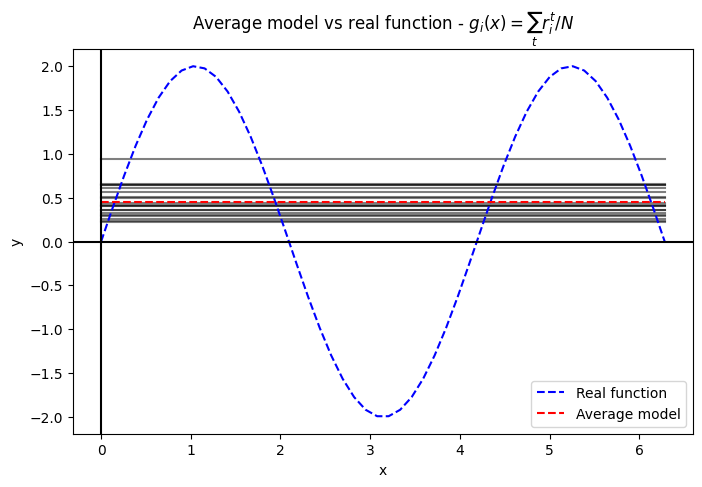

In [9]:
n_samples = 50
n_models = 20

f_x, f_y = f(n_samples, maxx = 2*np.pi)
modelsg3 = []
plt.figure(figsize=(8, 5))
for i in range(n_models):
    x, y = samples(n_samples, maxx = 2*np.pi)
    model = g3(x,y)
    modelsg3.append(model)
    plt.plot(f_x, model(f_x), color='black', alpha=0.5)
    plt.title('Average model vs real function - $g_i(x) = \sum_{t} r_i^t /N$') 
    plt.xlabel('x')
    plt.ylabel('y')

plt.plot(f_x, f_y, label='Real function', color='blue', linestyle='--')
plt.plot(f_x, averageModel(modelsg3,x), label='Average model', color='red', linestyle='--')
plt.axvline(0, color='black', linestyle='-')
plt.axhline(0, color='black', linestyle='-')
plt.legend()
plt.show()

In [10]:
varg3 = variance(modelsg3, f_x)
biasg3 = bias2(modelsg3, f_x, f_y)
mseg3 = meanSquareError(modelsg3, f_x, f_y)

print(f"Variance: {varg3:.4f}")
print(f"Bias: {biasg3:.4f}")
print(f"Mean Square Error: {mseg3:.4f}")

Variance: 0.0311
Bias: 1.7897
Mean Square Error: 1.8209


### Case 4. $g_i(x) = \min_t r_i^t$

In this scenario, the minimum value of the $r_i$ samples is chosen as the estimator of our function (In other words, the estimator will be a constant function related to one single data point again). This leads to several issues in the model performance; as we are using just one data point, this model will not capture completely the behaviour of the data. Traduced into the bias and variance schema, this model will lead to a large variance and a large bias; leading into a high error.

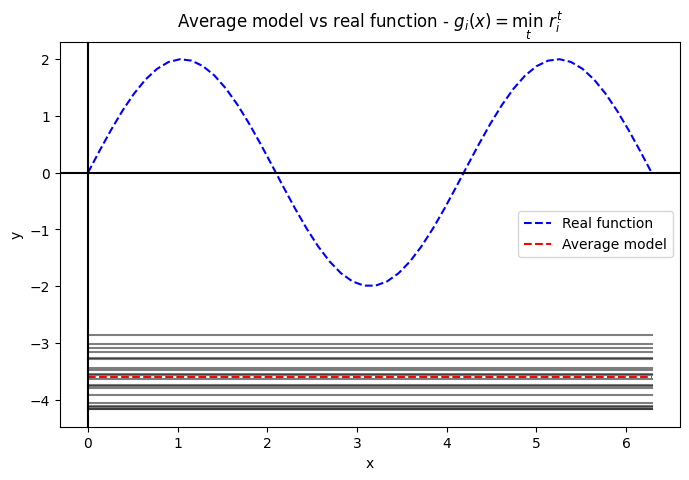

In [11]:
n_samples = 50
n_models = 20

f_x, f_y = f(n_samples, maxx = 2*np.pi)
modelsg4 = []
plt.figure(figsize=(8, 5))
for i in range(n_models):
    x, y = samples(n_samples, maxx = 2*np.pi)
    model = g4(x,y)
    modelsg4.append(model)
    plt.plot(f_x, model(f_x), color='black', alpha=0.5)
    plt.title('Average model vs real function - $g_i(x) = \min_t \,\, r_i^t$') 
    plt.xlabel('x')
    plt.ylabel('y')

plt.plot(f_x, f_y, label='Real function', color='blue', linestyle='--')
plt.plot(f_x, averageModel(modelsg4,x), label='Average model', color='red', linestyle='--')
plt.axvline(0, color='black', linestyle='-')
plt.axhline(0, color='black', linestyle='-')
plt.legend()
plt.show()

In [12]:
varg4 = variance(modelsg4, f_x)
biasg4 = bias2(modelsg4, f_x, f_y)
mseg4 = meanSquareError(modelsg4, f_x, f_y)

print(f"Variance: {varg4:.4f}")
print(f"Bias: {biasg4:.4f}")
print(f"Mean Square Error: {mseg4:.4f}")

Variance: 0.1593
Bias: 17.9724
Mean Square Error: 18.1316


### Comparing the for models

In [13]:
data = {
    'g1': {'variance': varg1, 'bias': biasg1, 'mse': mseg1},
    'g2': {'variance': varg2, 'bias': biasg2, 'mse': mseg2},
    'g3': {'variance': varg3, 'bias': biasg3, 'mse': mseg3},
    'g4': {'variance': varg4, 'bias': biasg4, 'mse': mseg4}
}

df = pd.DataFrame(data).T
df.head()

,variance,bias,mse
g1,3.053076,1.863215,4.916291
g2,0.000000,4.301433,4.301433
g3,0.031131,1.789727,1.820858
g4,0.159257,17.972363,18.131619


<Figure size 1000x500 with 0 Axes>

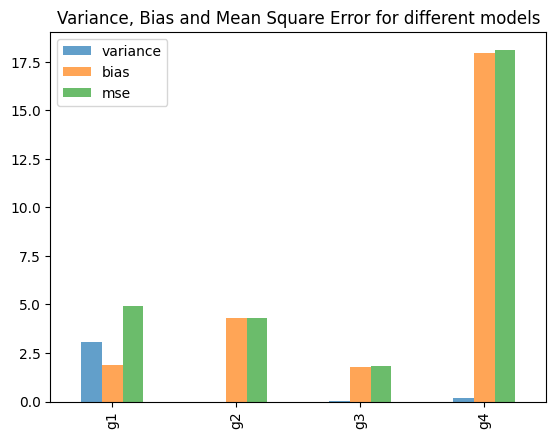

In [14]:
plt.figure(figsize=(10, 5))
df.plot(kind='bar', y=['variance', 'bias', 'mse'], alpha=0.7)
plt.title('Variance, Bias and Mean Square Error for different models')
plt.show()

Looking at this dataframe and diagram with the variances, errors and biases, we can conclude the following:

1. The model that uses the mean criteria has the best performance, as we increase the number of simulations, the model variance will decrease in a significant way and the bias may be low as the constant line used is choosed taking into account all the data points.
2. The arbitrary number criteria showed particular good results in this scenario, however, we must clarify that this happens because the real function was not too far of this value. If this condition does not hold (And in a real scenario we won't have guarantee of that), then the performance of the model may be really bad.
3. The models that used only one sample (Models $g_1$ and $g_4$) showed a very poor performance as they do not capture the data behaviour, in the case of the model $g_4$, we can see that variance reduces in a significant way as we use a value with a particular property (While in the other case it is just the first value of the set without any differential property). Comparing this two models, let us see the variance-bias trade-off scenario in a practical way.
4. Model $g_3$ shows the best trade-off between bias and variance

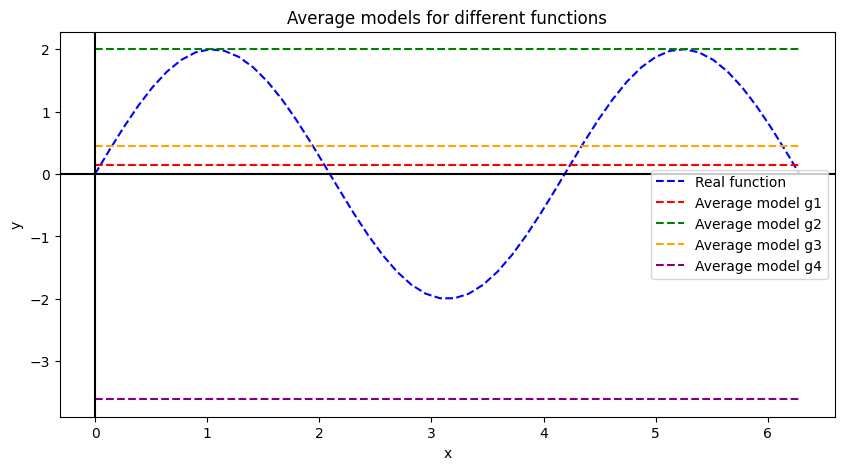

In [15]:
plt.figure(figsize=(10, 5))
plt.plot(f_x, f_y, label='Real function', color='blue', linestyle='--')
plt.plot(f_x, averageModel(modelsg1,f_x), label='Average model g1', color='red', linestyle='--')
plt.plot(f_x, averageModel(modelsg2,f_x), label='Average model g2', color='green', linestyle='--')
plt.plot(f_x, averageModel(modelsg3,f_x), label='Average model g3', color='orange', linestyle='--')
plt.plot(f_x, averageModel(modelsg4,f_x), label='Average model g4', color='purple', linestyle='--')
plt.axvline(0, color='black', linestyle='-')
plt.axhline(0, color='black', linestyle='-')
plt.title('Average models for different functions')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In the plot, we can see that even if we have 4 models that represent the same type of function (All of them are constant functions), we must be very careful when we choose a criteria to define our model, as this decisions may lead into scenarios where the model (Even if it is the best to describe our data) may not be able to have a good performance in the regression process

## Exercise 2

Repeat the experiments in the bias and variance notebook using ridge regression. Use a fixed
polynomial degree (e.g. 10) and vary the α parameter.

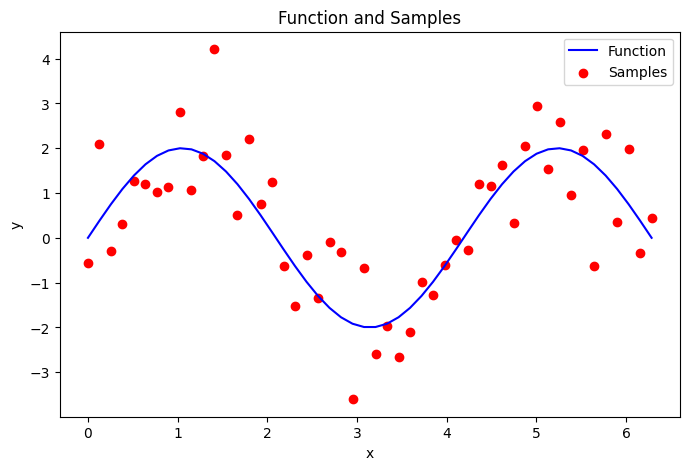

In [16]:
plt.figure(figsize=(8, 5))
f_x, f_y = f(50, maxx = 2*np.pi)
plt.plot(f_x, f_y, label='Function', color='blue')
x, y = samples(50, maxx = 2*np.pi)
plt.scatter(x, y, label='Samples', color='red')
plt.title('Function and Samples')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

We define our LinearRegression and Ridge based adjustments so that we can compare them at the end

### Model fitting

In [17]:
def fit_polynomial(x, y, degree):
    '''
    Fits a polynomial to the input sample.
    (x,y): input sample
    degree: polynomial degree
    '''
    model = LinearRegression()
    model.fit(np.vander(x, degree + 1), y)
    return model

def fit_polynomial_ridge(x, y, degree, alpha = 0.5):
    '''
    Fits a polynomial to the input sample.
    (x,y): input sample
    degree: polynomial degree
    '''
    model = Ridge(alpha=alpha)
    model.fit(np.vander(x, degree + 1), y)
    return model

def apply_polynomial(model, x):
    '''
    Evaluates a linear regression model in an input sample
    model: linear regression model
    x: input sample
    '''
    degree = model.coef_.size - 1
    y = model.predict(np.vander(x, degree + 1))
    return y

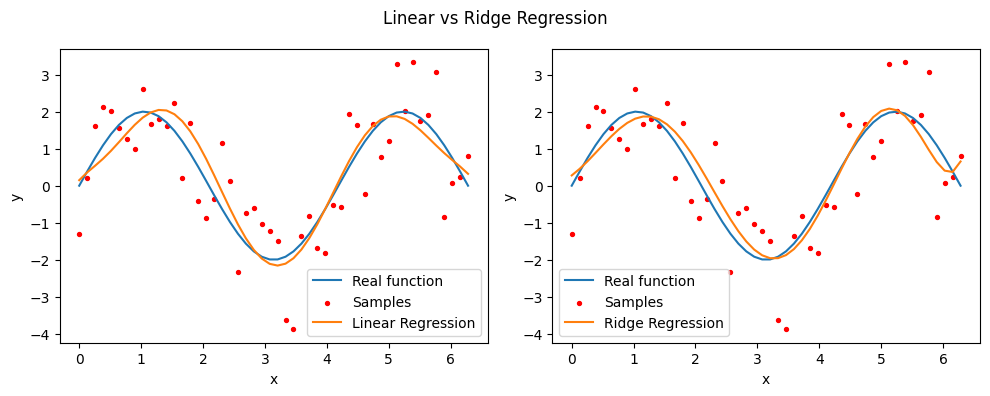

In [18]:
degree = 8
linear = fit_polynomial(x, y, degree)
ridge = fit_polynomial_ridge(x, y, degree)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
f_x, f_y = f(50, maxx = 2*np.pi)
x, y = samples(50, maxx = 2*np.pi)

ax1.plot(f_x, f_y, label='Real function')
ax1.scatter(x, y, label='Samples', color='red', s=8)
ax1.plot(f_x, apply_polynomial(linear, f_x), label='Linear Regression')

ax2.plot(f_x, f_y, label='Real function')
ax2.scatter(x, y, label='Samples', color='red', s=8)
ax2.plot(f_x, apply_polynomial(ridge, f_x), label='Ridge Regression')


ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.legend()
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.legend()
fig.suptitle('Linear vs Ridge Regression')
plt.tight_layout()
plt.show()

### Model averaging

We make an example of model averaging for the linear and ridge regression

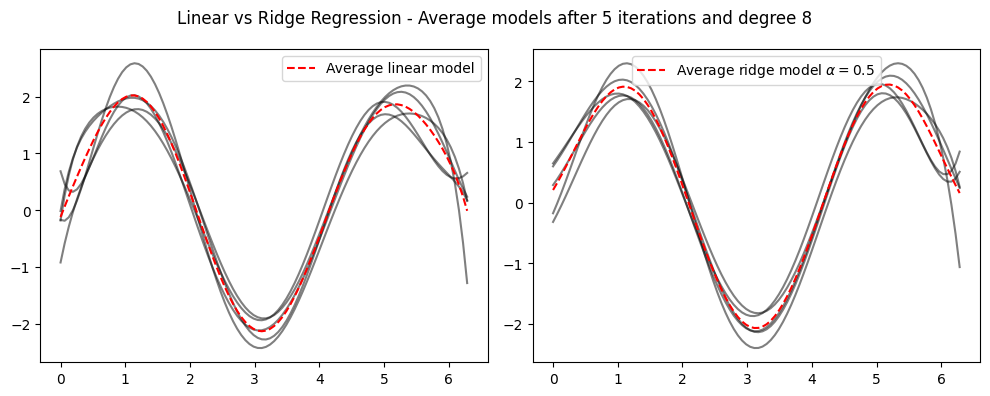

In [19]:
degree = 8
n_samples = 100
n_models = 5
avg_y_linear = np.zeros(n_samples)
avg_y_ridge = np.zeros(n_samples)
alpha = 0.5

fig , (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
f_x, f_y = f(n_samples, maxx = 2*np.pi)
linear_models = []
ridge_models = []

for i in range(n_models):
    (x, y) = samples(n_samples, shuffle=False, maxx=2*np.pi)
    model_linear = fit_polynomial(x, y, degree)
    model_ridge = fit_polynomial_ridge(x, y, degree, alpha=alpha)
    p_y_linear = apply_polynomial(model_linear, x)
    p_y_ridge = apply_polynomial(model_ridge, x)

    # Bind model using default argument to avoid late binding
    linear_models.append(lambda x, model=model_linear: apply_polynomial(model, x))
    ridge_models.append(lambda x, model=model_ridge: apply_polynomial(model, x))

    ax1.plot(x, p_y_linear, color='black', alpha=0.5)
    ax2.plot(x, p_y_ridge, color='black', alpha=0.5)


avg_y_linear = averageModel(linear_models, x)
avg_y_ridge = averageModel(ridge_models, x)

ax1.plot(x, avg_y_linear, color = 'red', linestyle = '--', label='Average linear model')
ax2.plot(x, avg_y_ridge, color = 'red', linestyle = '--', label=f'Average ridge model $\\alpha={alpha}$')
ax1.legend()
ax2.legend()
plt.suptitle(f'Linear vs Ridge Regression - Average models after {n_models} iterations and degree {degree}')
plt.tight_layout()
plt.show()

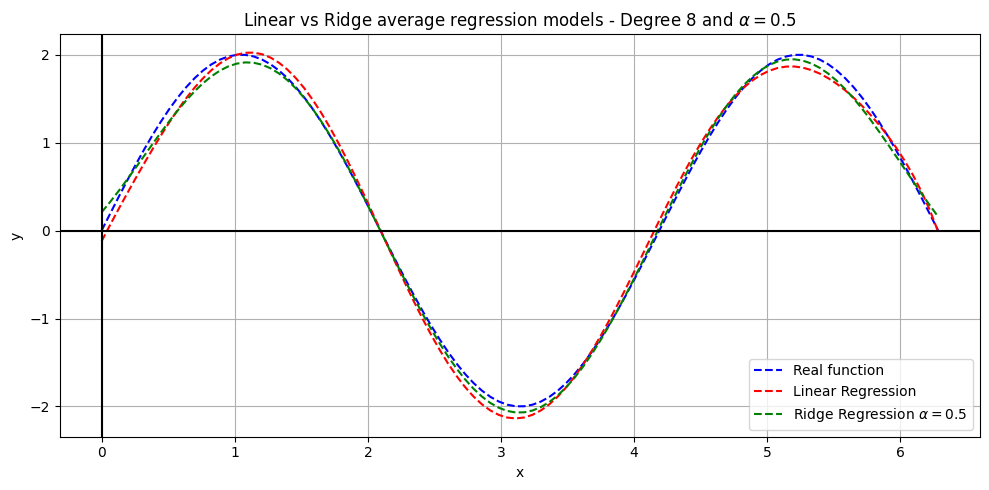

In [20]:
plt.figure(figsize=(10, 5))
plt.plot(f_x, f_y, label='Real function', color='blue', linestyle='--')
plt.plot(x, avg_y_linear, label='Linear Regression', color='red', linestyle='--')
plt.plot(x, avg_y_ridge, label=f'Ridge Regression $\\alpha = {alpha}$', color='green', linestyle='--')
plt.axvline(0, color='black', linestyle='-')
plt.axhline(0, color='black', linestyle='-')
plt.title(f'Linear vs Ridge average regression models - Degree {degree} and $\\alpha = {alpha}$')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.tight_layout()
plt.grid()
plt.show()

### Calculating bias and variance

In [21]:
n_samples = 20
maxx = 2*np.pi
f_x, f_y = f(n_samples , maxx = maxx)
n_models = 20
max_degree = 15
alpha = 0.5

var_vals_linear =[]
bias_vals_linear = []
error_vals_linear = []

var_vals_ridge =[]
bias_vals_ridge = []
error_vals_ridge = []

for degree in range(1, max_degree):
    avg_y = np.zeros(n_samples)
    linear_models = []
    ridge_models = []

    for i in range(n_models):
        (x,y) = samples(n_samples, shuffle=False,maxx = 2*np.pi)
        model_linear = fit_polynomial(x, y, degree)
        model_ridge = fit_polynomial_ridge(x, y, degree, alpha=alpha)
        p_y_linear = apply_polynomial(model_linear, x)
        p_y_ridge = apply_polynomial(model_ridge, x)
        
        linear_models.append(lambda x, model=model_linear: apply_polynomial(model, x))
        ridge_models.append(lambda x, model=model_ridge: apply_polynomial(model, x))

    bias_2_linear = bias2(linear_models, x, f_y)
    bias_2_ridge = bias2(ridge_models, x, f_y)

    var_linear = variance(linear_models, x)
    var_ridge = variance(ridge_models, x)

    error_linear = meanSquareError(linear_models, x, f_y)
    error_ridge = meanSquareError(ridge_models, x, f_y)

    var_vals_linear.append(var_linear)
    bias_vals_linear.append(bias_2_linear)
    error_vals_linear.append(error_linear)
    var_vals_ridge.append(var_ridge)
    bias_vals_ridge.append(bias_2_ridge)
    error_vals_ridge.append(error_ridge)

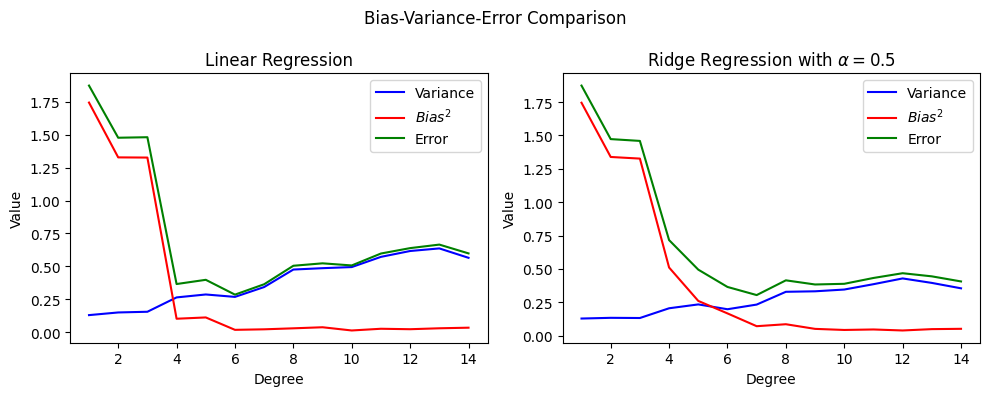

In [22]:
r = range(1, max_degree)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
ax1.plot(r, var_vals_linear, label='Variance', color='blue')
ax1.plot(r, bias_vals_linear, label='$Bias^2$', color='red')
ax1.plot(r, error_vals_linear, label='Error', color='green')
ax1.set_xlabel('Degree')
ax1.set_ylabel('Value')
ax1.set_title('Linear Regression')
ax1.legend()
ax2.plot(r, var_vals_ridge, label='Variance', color='blue')
ax2.plot(r, bias_vals_ridge, label='$Bias^2$', color='red')
ax2.plot(r, error_vals_ridge, label='Error', color='green')
ax2.set_xlabel('Degree')
ax2.set_ylabel('Value')
ax2.set_title(f'Ridge Regression with $\\alpha = {alpha}$')
ax2.legend()
plt.suptitle('Bias-Variance-Error Comparison')
plt.tight_layout()
plt.show()

### Cross Validation

In [23]:
n_samples = 20
maxx = 2*np.pi
# train sample
train_x, train_y = samples(n_samples,maxx=maxx,shuffle=False)
# validation sample
test_x, test_y = samples(n_samples,maxx=maxx, shuffle=False)


max_degree = 20
alpha = 0.5
test_error_vals = []
train_error_vals = []
test_error_vals_ridge = []
train_error_vals_ridge = []

for degree in range(1, max_degree):
    model = fit_polynomial(train_x, train_y, degree)
    p_y = apply_polynomial(model, train_x)
    train_error_vals.append(np.linalg.norm(train_y - p_y)**2)
    p_y = apply_polynomial(model, test_x)
    test_error_vals.append(np.linalg.norm(test_y - p_y)**2)

    model = fit_polynomial_ridge(train_x, train_y, degree, alpha=alpha)
    p_y = apply_polynomial(model, train_x)
    train_error_vals_ridge.append(np.linalg.norm(train_y - p_y)**2)
    p_y = apply_polynomial(model, test_x)
    test_error_vals_ridge.append(np.linalg.norm(test_y - p_y)**2)



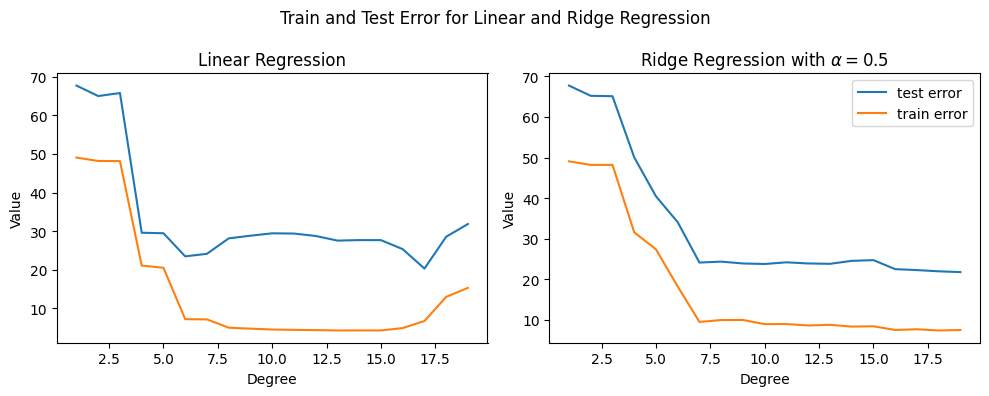

In [24]:
fig , (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
ax1.plot(range(1, max_degree), test_error_vals, label='test error')
ax1.plot(range(1, max_degree), train_error_vals, label='train error')

ax1.set_xlabel('Degree')
ax1.set_ylabel('Value')

ax1.set_title('Linear Regression')

ax2.plot(range(1, max_degree), test_error_vals_ridge, label='test error')

ax2.plot(range(1, max_degree), train_error_vals_ridge, label='train error')
ax2.set_xlabel('Degree')
ax2.set_ylabel('Value')
ax2.set_title(f'Ridge Regression with $\\alpha = {alpha}$')
ax2.legend()
plt.suptitle('Train and Test Error for Linear and Ridge Regression')
plt.tight_layout()
plt.show()

### How does regularization impacts? 

In order to see how regularization impacts, we will fix a degree of 8 in our regression and move the alpha paramater from 0 to 10 within 11 posible values

In [25]:
alphas = np.linspace(0,10,21)
degree = 8
alphas

array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,
        5.5,  6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. ])

### Single problem solution shape

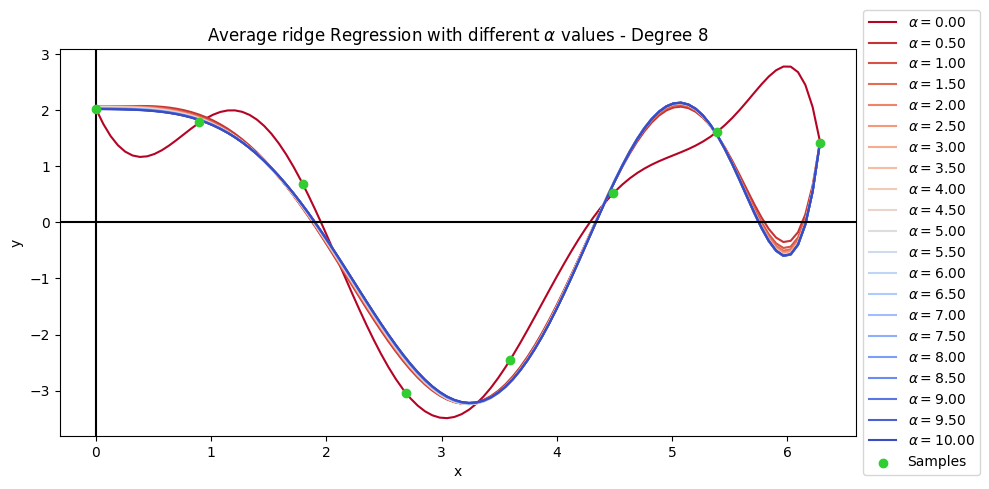

In [26]:
n_samples = 8
f_x , f_y = f(100, maxx = 2*np.pi)

plt.figure(figsize=(10, 5))

norm = colors.Normalize(vmin=min(alphas), vmax=max(alphas))
cmap = cm.coolwarm_r

x,y = samples(n_samples, maxx=2*np.pi)

for alpha in alphas:
    model = fit_polynomial_ridge(x, y, degree, alpha=alpha)
    p_y = apply_polynomial(model, f_x)
    color = cmap(norm(alpha))
    plt.plot(f_x, p_y, label=f'$\\alpha = {alpha:.2f}$', color=color, zorder=1)

#plt.plot(f_x, f_y, label='Real function', color='green', linestyle='--')
plt.scatter(x, y, label='Samples', color='limegreen', zorder=10)
plt.axvline(0, color='black', linestyle='-')
plt.axhline(0, color='black', linestyle='-')
plt.title(f'Average ridge Regression with different $\\alpha$ values - Degree {degree}')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show() 

We can see as the $\alpha$ value is smaller, the adjust of the polynomial will be stronger to the data, leading to possible overfitting, then, choosing a good value for $\alpha$ becomes a task to improve the model performance

### Analyzing average solution shape

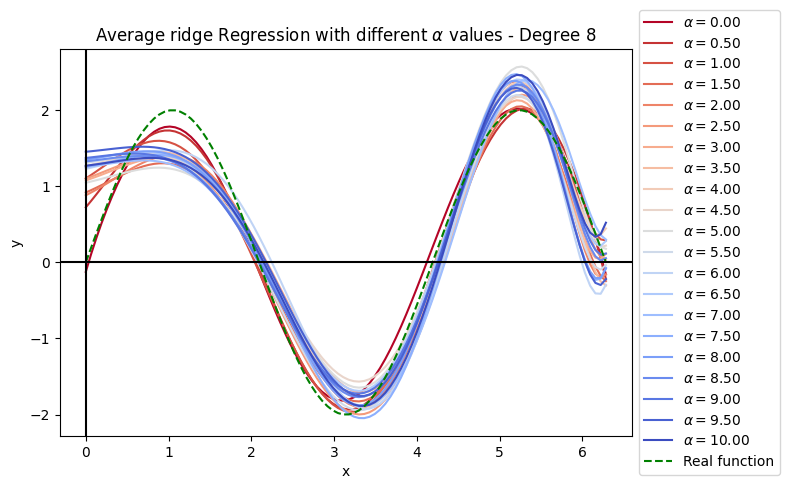

In [27]:
n_samples = 20
f_x , f_y = f(100, maxx = 2*np.pi)
n_models = 15
plt.figure(figsize=(8, 5))

norm = colors.Normalize(vmin=min(alphas), vmax=max(alphas))
cmap = cm.coolwarm_r

for alpha in alphas:
    ridge_models = []
    for i in range(n_models):
        (x, y) = samples(n_samples, shuffle=False, maxx=2*np.pi)
        model_ridge = fit_polynomial_ridge(x, y, degree, alpha=alpha)
        p_y_ridge = apply_polynomial(model_ridge, x)

        # Bind model using default argument to avoid late binding
        ridge_models.append(lambda x, model=model_ridge: apply_polynomial(model, x))

    p_y = averageModel(ridge_models, f_x)
    color = cmap(norm(alpha))
    plt.plot(f_x, p_y, label=f'$\\alpha = {alpha:.2f}$', color=color)

plt.plot(f_x, f_y, label='Real function', color='green', linestyle='--')
plt.axvline(0, color='black', linestyle='-')
plt.axhline(0, color='black', linestyle='-')
plt.title(f'Average ridge Regression with different $\\alpha$ values - Degree {degree}')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show() 

In this plot, we can see that the $\alpha$ parameter affects in a significant way how the average model is near to the real function. In this particular case, we can see that choosing a very high value starts to become unprofit as it sacrifices the generalization capacity of the model. Then, choosing a not too low and not too large $\alpha$ seems to be a challenging task

### Bias-Viarance-Error behaviour

In [28]:
n_samples = 20
f_x , f_y = f(100, maxx = 2*np.pi)
n_models = 15

data = {
    'alpha': [],
    'bias2': [],
    'variance': [],
    'error': []
}

for alpha in alphas:
    ridge_models = []
    for i in range(n_models):
        (x, y) = samples(n_samples, shuffle=False, maxx=2*np.pi)
        model_ridge = fit_polynomial_ridge(x, y, degree, alpha=alpha)
        p_y_ridge = apply_polynomial(model_ridge, x)
        ridge_models.append(lambda x, model=model_ridge: apply_polynomial(model, x))

    bias2_ = bias2(ridge_models, f_x, f_y)
    var_ = variance(ridge_models, f_x)
    mse_ = meanSquareError(ridge_models, f_x, f_y)

    data['alpha'].append(alpha)
    data['bias2'].append(bias2_)
    data['variance'].append(var_)
    data['error'].append(mse_)

    print(f"Alpha: {alpha:.2f} - Bias^2: {bias2_:.4f} - Variance: {var_:.4f} - MSE: {mse_:.4f}")

Alpha: 0.00 - Bias^2: 0.0113 - Variance: 0.3739 - MSE: 0.3852
Alpha: 0.50 - Bias^2: 0.0594 - Variance: 0.2748 - MSE: 0.3342
Alpha: 1.00 - Bias^2: 0.1073 - Variance: 0.2877 - MSE: 0.3950
Alpha: 1.50 - Bias^2: 0.1062 - Variance: 0.2021 - MSE: 0.3083
Alpha: 2.00 - Bias^2: 0.1757 - Variance: 0.2414 - MSE: 0.4171
Alpha: 2.50 - Bias^2: 0.1355 - Variance: 0.2363 - MSE: 0.3719
Alpha: 3.00 - Bias^2: 0.1672 - Variance: 0.2511 - MSE: 0.4183
Alpha: 3.50 - Bias^2: 0.1492 - Variance: 0.2423 - MSE: 0.3915
Alpha: 4.00 - Bias^2: 0.1513 - Variance: 0.1964 - MSE: 0.3477
Alpha: 4.50 - Bias^2: 0.1622 - Variance: 0.2493 - MSE: 0.4115
Alpha: 5.00 - Bias^2: 0.1499 - Variance: 0.2287 - MSE: 0.3787
Alpha: 5.50 - Bias^2: 0.1568 - Variance: 0.2437 - MSE: 0.4005
Alpha: 6.00 - Bias^2: 0.1526 - Variance: 0.2786 - MSE: 0.4311
Alpha: 6.50 - Bias^2: 0.1759 - Variance: 0.2724 - MSE: 0.4483
Alpha: 7.00 - Bias^2: 0.1745 - Variance: 0.2055 - MSE: 0.3801
Alpha: 7.50 - Bias^2: 0.1692 - Variance: 0.2042 - MSE: 0.3734
Alpha: 8

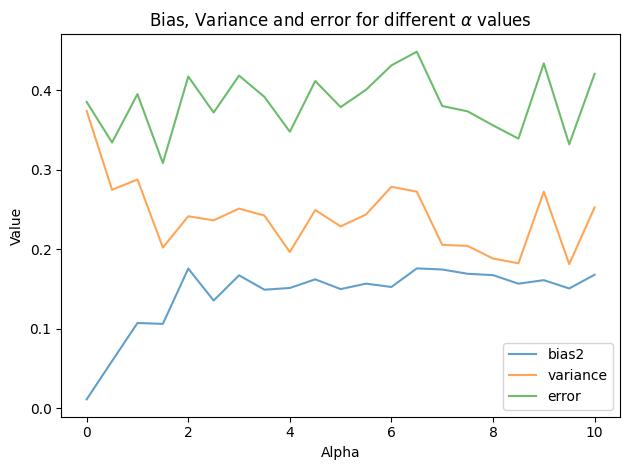

In [29]:
df = pd.DataFrame(data).set_index('alpha')
df.plot(kind='line', alpha=0.7)
plt.title('Bias, Variance and error for different $\\alpha$ values')
plt.xlabel('Alpha')
plt.ylabel('Value')
plt.legend()
plt.tight_layout()
plt.show()

In this scenario, we can see that the bias starts increasing because of the model incapacity to achieve the original distribution due to larger $\alpha$ values. Then, we can spot a trade-off bias-variance point between 1 and 3. In order to see this behaviour in a more interesting way, we will plot a surface with the related error

### Error surface (Does it have a pattern?)

In [30]:
n_samples = 20
f_x , f_y = f(100, maxx = 2*np.pi)
n_models = 15
max_degree = 15

data = {
    'alpha': [],
    'degree' : [],
    'bias2': [],
    'variance': [],
    'error': []
}

for degree in range(1,max_degree):
    for alpha in alphas:
        ridge_models = []
        for i in range(n_models):
            (x, y) = samples(n_samples, shuffle=False, maxx=2*np.pi)
            model_ridge = fit_polynomial_ridge(x, y, degree, alpha=alpha)
            p_y_ridge = apply_polynomial(model_ridge, x)
            ridge_models.append(lambda x, model=model_ridge: apply_polynomial(model, x))

        bias2_ = bias2(ridge_models, f_x, f_y)
        var_ = variance(ridge_models, f_x)
        mse_ = meanSquareError(ridge_models, f_x, f_y)

        data['alpha'].append(alpha)
        data['bias2'].append(bias2_)
        data['variance'].append(var_)
        data['error'].append(mse_)
        data['degree'].append(degree)

df = pd.DataFrame(data)
df.head()

,alpha,degree,bias2,variance,error
0,0.0,1,1.806760,0.088416,1.895175
1,0.5,1,1.820333,0.130907,1.951239
2,1.0,1,1.813849,0.091051,1.904900
3,1.5,1,1.807424,0.100702,1.908126
4,2.0,1,1.812494,0.061162,1.873656


In [31]:
def plot_3d(z_axis='error', elev=30, azim=45):
    X = df['alpha']
    Y = df['degree']
    Z = df[z_axis]

    # Find the index of the minimum Z value
    min_idx = Z.idxmin()
    min_x = X[min_idx]
    min_y = Y[min_idx]
    min_z = Z[min_idx]

    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111, projection='3d')
    surf = ax.plot_trisurf(X, Y, Z, cmap='viridis', edgecolor='none',alpha=0.9, zorder = 1)

    # Plot the minimum point as a red dot
    ax.plot([min_x, min_x], [min_y, min_y], [0, max(Z)], color='red', linestyle='--',
            zorder=15)
    ax.scatter(min_x, min_y, min_z, color='red', s=10, 
                label='Minimum point -  $\\alpha$ = %.2f, degree =  %.2f' % (min_x, min_y),
                zorder = 15)

    # Labels and view
    ax.set_xlabel('Alpha')
    ax.set_ylabel('Degree')
    ax.set_zlabel(z_axis.capitalize())
    ax.set_title(f'3D Surface of {z_axis}')
    ax.view_init(elev=elev, azim=azim)

    # Add colorbar and legend
    fig.colorbar(surf, ax=ax, shrink=0.5, aspect=10)
    ax.legend()

    plt.show()


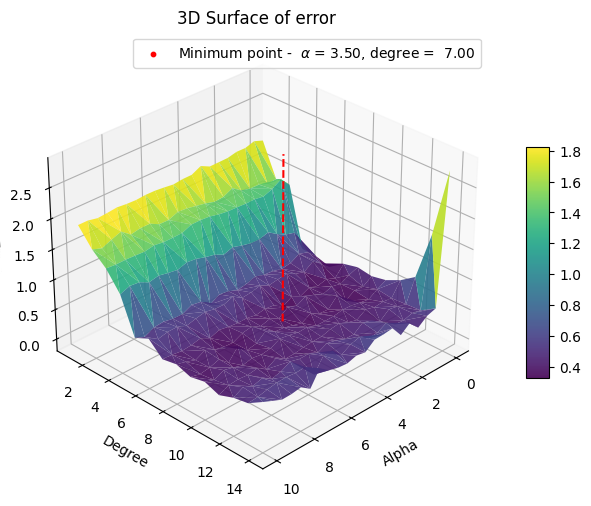

In [32]:
plot_3d(z_axis='error',elev=30, azim=45)

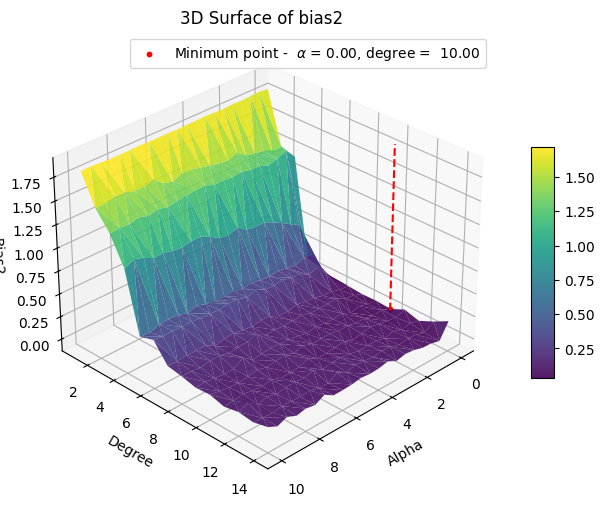

In [33]:
plot_3d(z_axis='bias2',elev=30, azim=45)

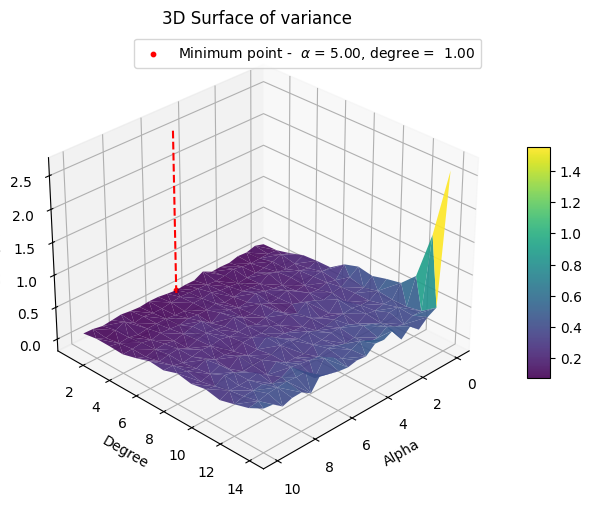

In [34]:
plot_3d(z_axis='variance',elev=30, azim=45)

If your notebook environment supports it, run the following cell for an interactive view of the surface

In [35]:
'''
interact(plot_3d,
         z_axis=Dropdown(options=['error', 'bias2', 'variance'], value='error', description='Z-axis:'),
         elev=FloatSlider(min=0, max=90, step=5, value=30, description='Elevation'),
         azim=FloatSlider(min=0, max=360, step=5, value=45, description='Azimuth'))
'''
# Uncomment the above line to enable interactive 3D plot with sliders
# Note: The interactive plot may not work in all environments.
# You can run the code in a Jupyter Notebook or any other Python environment that supports ipywidgets.
# The interactive plot will allow you to change the Z-axis, elevation, and azimuth angles.
print("End of the script.")

End of the script.


In this final scenario, we can check the importance of selecting a good alpha value in our ridge regression. Bias and variance may have different behaviour (Being even extremely-dependant on the model params values). Then, with the surface we could see that there exists a combination of parameters that minimizes the error letting a good variance-bias trade-off. The following plot shows the best model given the surface analysis

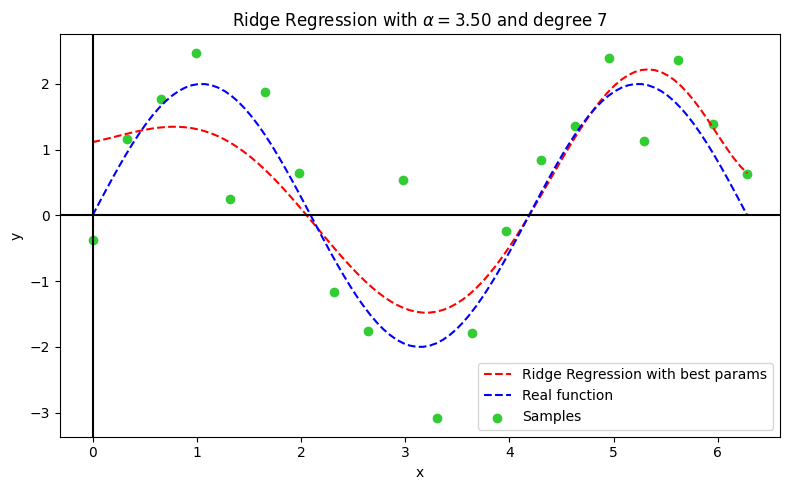

In [36]:
X = df['alpha']
Y = df['degree']
Z = df['error']
 
min_idx = Z.idxmin()
alpha = X[min_idx]
degree = Y[min_idx]

n_samples = 20
f_x , f_y = f(100, maxx = 2*np.pi)
x,y = samples(n_samples, maxx=2*np.pi)


model = fit_polynomial_ridge(x, y, degree, alpha=alpha)
p_y = apply_polynomial(model, f_x)
plt.figure(figsize=(8, 5))
plt.plot(f_x, p_y, label=f'Ridge Regression with best params', color='red', linestyle='--')
plt.plot(f_x, f_y, label='Real function', color='blue', linestyle='--')
plt.scatter(x, y, label='Samples', color='limegreen')
plt.axvline(0, color='black', linestyle='-')
plt.axhline(0, color='black', linestyle='-')
plt.title(f'Ridge Regression with $\\alpha = {alpha:.2f}$ and degree {degree}')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.tight_layout()
plt.show()
